In [25]:
# Built-in modules
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import cv2
import progressbar

In [37]:
files = glob("../kaggle_data/train_resize/*.jpeg")

In [6]:
len(files)

35126

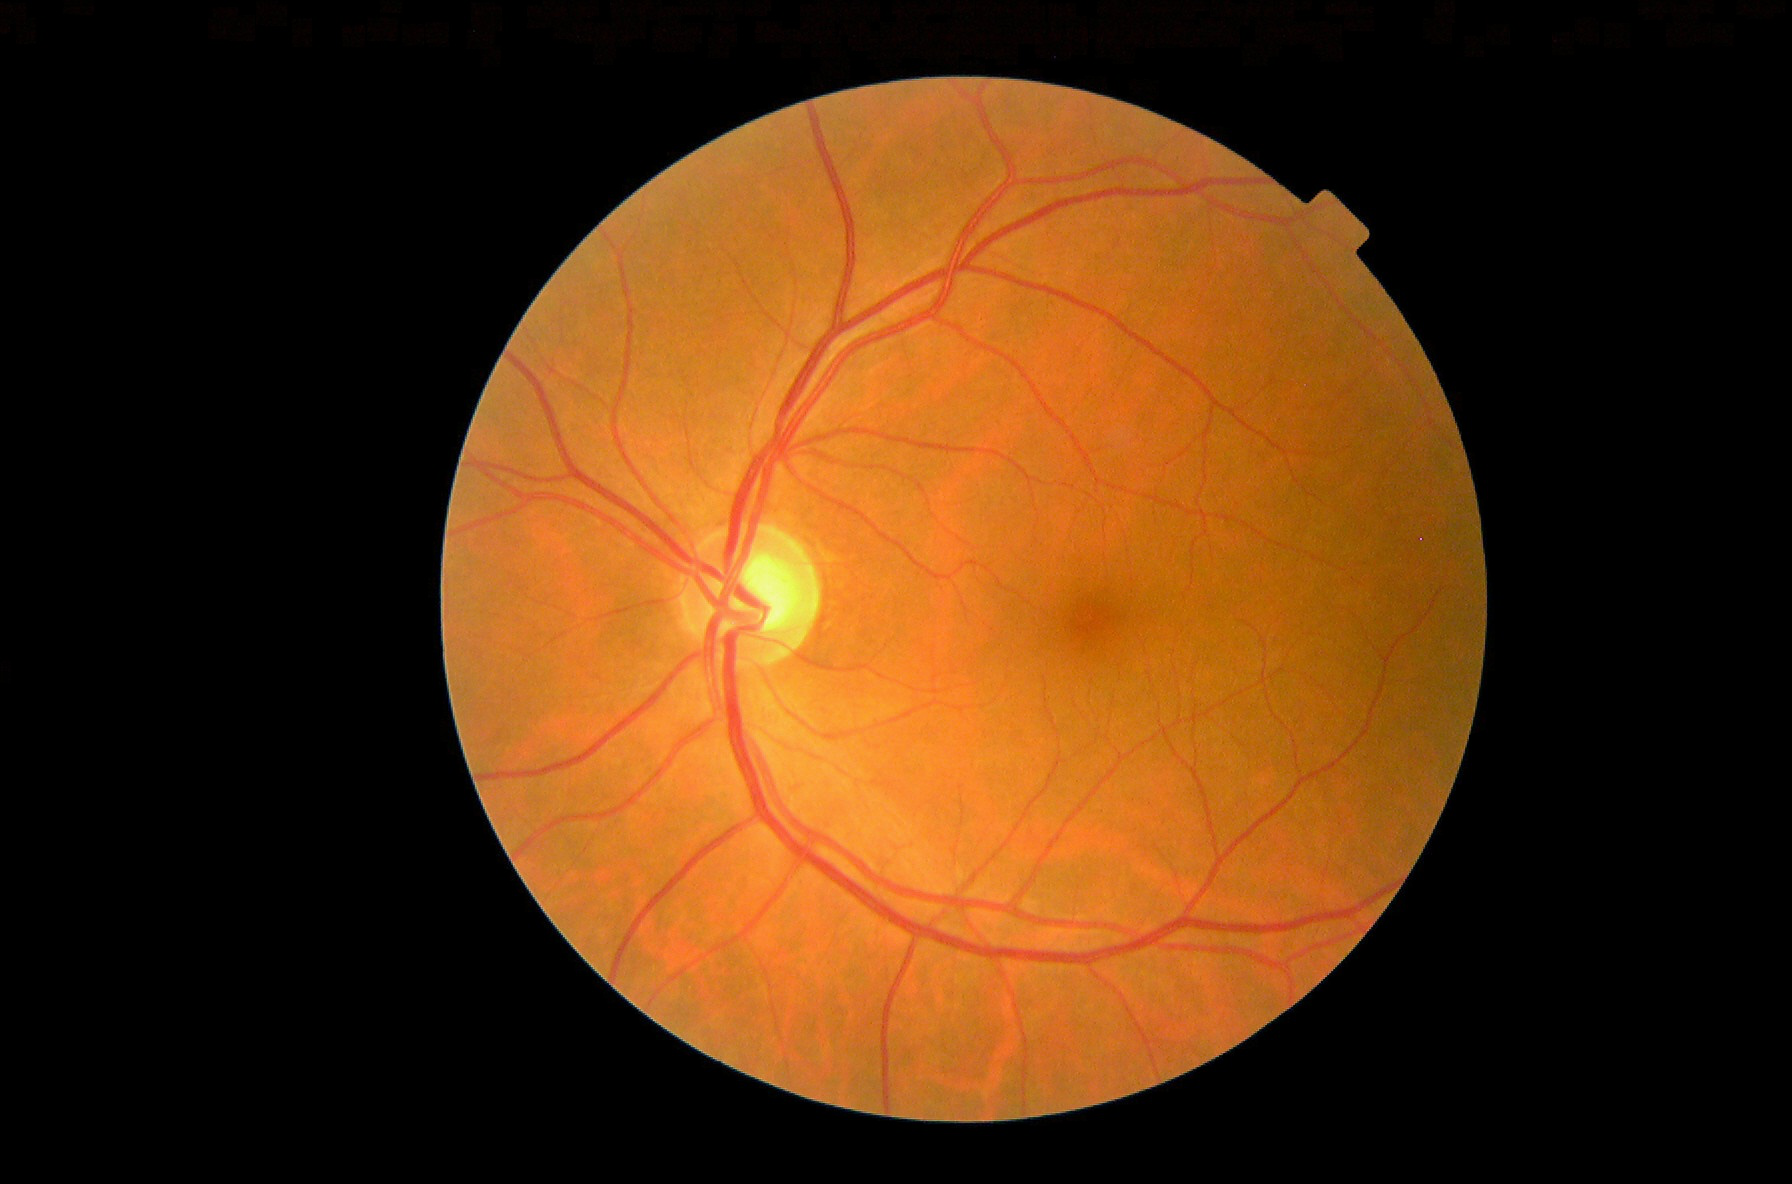

In [27]:
img = Image.open(files[1])
img

In [9]:
df = pd.read_csv("../kaggle_data/trainLabels.csv")

In [10]:
df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [40]:
def crop_margin_PIL(image):
    """
    주변의 검정색을 지워 버립니다.
    :param path:
    :return:
    """

    """
    file name =1002959_20130627_L.png
    """
    im = image
    np_img = np.asarray(im)
    mean_pix = np.mean(np_img)
    pix = im.load()
    height, width = im.size  # Get the width and hight of the image for iterating over
    # pix[1000,1000] #Get the RGBA Value of the a pixel of an image
    c_x, c_y = (int(height / 2), int(width / 2))
    for y in range(c_y):
        if sum(pix[c_x, y]) > mean_pix:
            left = (c_x, y)
            break;
    for x in range(c_x):
        if sum(pix[x, c_y]) > mean_pix:
            up = (x, c_y)
            break;

    crop_img = im.crop((up[0], left[1], left[0], up[1]))

    #plt.imshow(crop_img)

    diameter_height = up[1] - left[1]
    diameter_width = left[0] - up[0]

    crop_img = im.crop((up[0], left[1], left[0] + diameter_width, up[1] + diameter_height))
    #print end_time - start_time

    return crop_img

In [47]:
for f in progressbar.progressbar(files) :
    
    img = crop_margin_PIL(Image.open(f))
    img = np.array(img)
    
    
    if img.shape[1] > img.shape[0] :
        padding = np.zeros(((img.shape[1]-img.shape[0])//2,img.shape[1],3))
        img = np.concatenate([padding,img,padding],axis=0)
    else :
        padding = np.zeros((img.shape[0],(img.shape[0]-img.shape[1])//2,3))
        img = np.concatenate([padding,img,padding],axis=1)
    
    
    img = Image.fromarray(img.astype("uint8"))
    img = img.resize((300,300))
    img.save(f)

 40% (14097 of 35126) |#######           | Elapsed Time: 0:47:44 ETA:   1:15:02

UnboundLocalError: local variable 'up' referenced before assignment

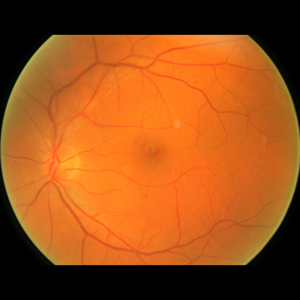

In [46]:
img